In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from TRSF import trsf

Path_to_samples = '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_'
Path_to_3CRXX = '/Users/rs17612/Documents/Radio_Data/3CRR/'
# search the directory for files with name starting with cutout_
# and ending with .fits

import glob
filesnames = glob.glob(Path_to_3CRXX+'*')
filesnames_cutout = glob.glob(Path_to_samples+'*')  
filesnames

import skimage.measure as measure
def plottings(cat,ptype,color,img,name,ax,linewidth):
    
    
    label = False
    masks = np.zeros(img.shape)
    for i in range(0,len(cat)):
        row = cat.iloc[i]
        if ptype=='bbox':
            bbox = row.bbox
            if bbox != None:
                xmin = bbox[0] - 1
                xmax = bbox[2] + 1
                ymin = bbox[1] - 1
                ymax = bbox[3] + 1
                if label == False:
                    ax.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color=color,label=name,linewidth=linewidth)
                    label = True
                ax.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color=color,linewidth=linewidth)
        if ptype == 'point':
            ax.plot(row.y,row.x,'+',color=color)
        
        if ptype == 'polygonwith':
            polygon = row.polygon
            try:
                if label == False:
                    ax.plot(polygon[:,1],polygon[:,0],color=color,label=name,linewidth=linewidth)
                    label = True
                else:
                    ax.plot(polygon[:,1],polygon[:,0],color=color,linewidth=linewidth)  
            except:
                plottings(cat,'polygonwithout',color,img,name,ax,linewidth=linewidth)  
        if ptype == 'polygonwithout':
        # we much create the polygons from the birth and death points
            birth = row.Birth
            death = row.Death
            mask = np.zeros(img.shape)
            mask = np.logical_or(mask, np.logical_and(img <= birth, img > death))
        
            mask = get_enclosing_mask(int(row.y1),int(row.x1),mask)    
            mask = mask.astype(int)
            contour = measure.find_contours(mask)[0]

            if label == False:
                ax.plot(contour[:,1],contour[:,0],color=color,label=name,linewidth=linewidth)
                label= True
            else:
                ax.plot(contour[:,1],contour[:,0],color=color,linewidth=linewidth)   
            masks = masks + mask
    return masks

def get_enclosing_mask(x, y, mask):
    '''
    Returns the mask of the enclosed area of the point (x,y) in the mask.
    '''
    
    # Ensure the point is inside the mask
    if not mask[y, x]:
        return None
    # Create a copy of the mask
    enclosed_mask = np.copy(mask)
    # Perform a flood fill starting from the point
    h, w = mask.shape
    stack = [(x, y)]
    while stack:
        x, y = stack.pop()
        if enclosed_mask[y, x]:
            enclosed_mask[y, x] = False
            if x > 0:
                stack.append((x - 1, y))
            if x < w - 1:
                stack.append((x + 1, y))
            if y > 0:
                stack.append((x, y - 1))
            if y < h - 1:
                stack.append((x, y + 1))
    
    return mask & (~enclosed_mask)


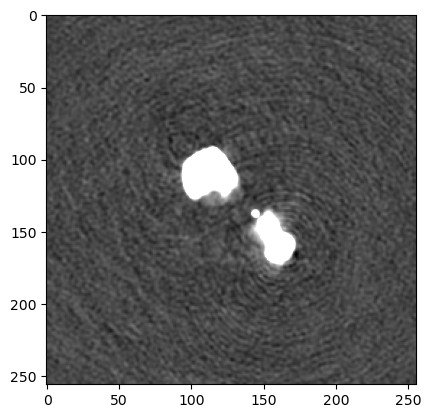

In [2]:
from astropy.io import fits
import numpy as np

# Read in the data
hdulist = fits.open(filesnames[0])
data = hdulist[0].data[0,0,:,:]

plt.imshow(data, cmap='gray',vmax=0.001)
plt.show()

In [3]:
def trsf_3CRXX(arr):
    data = trsf(None,arrtype=True,arr=arr,plot=False,region_expansion=False,expsigma=2,lower_cut_threshold=3)
    return data

def make_square(img):
    # make image square by adding padding
    if img.shape[0] > img.shape[1]:
        diff = img.shape[0] - img.shape[1]
        pad = np.zeros((img.shape[0],diff))
        img = np.concatenate((img,pad),axis=1)
    elif img.shape[1] > img.shape[0]:
        diff = img.shape[1] - img.shape[0]
        pad = np.zeros((diff,img.shape[1]))
        img = np.concatenate((img,pad),axis=0)
    return img


'''
rows = 2
cols = 3
no_i_list = [6,7,8]
fid, ax = plt.subplots(rows,cols,figsize=(15,10))
i = 0
for row in range(rows):
    for col in range(cols):
        print(filesnames[i])
        hdulist = fits.open(filesnames[i])
        
        i = i + 1
        
        
        data = hdulist[0].data
        print(data.shape)
        try:
            data = data[0,0,:,:]       
        except IndexError:
            data = data[0,:,:]
        # make image square
        if data.shape[0] != data.shape[1]:
            data = make_square(data)
        data = trsf_3CRXX(data)
        catalogue = data.catalogue
        image = data.full_img

        cat0 = catalogue[catalogue['Class'] == 0]
        cat1 = catalogue[catalogue['Class'] == 1]
        cat2 = catalogue[catalogue['Class'] == 2]
        cat3 = catalogue[catalogue['Class'] == 3]

        ax[row,col].imshow(image,cmap='gray',vmax=0.01)
        plottings(cat2,'polygonwith',color='r',img=image,name='Class 2',ax=ax[row,col],linewidth=0.2)
        plottings(cat0,'polygonwithout',color='r',img=image,name='Class 0',ax=ax[row,col],linewidth=0.5)
        plottings(cat3,'polygonwithout',color='r',img=image,name='Class 3',ax=ax[row,col],linewidth=0.5)
        plottings(cat1,'polygonwithout',color='y',img=image,name='Class 1',ax=ax[row,col],linewidth=0.5)
        #ax[row,col].set_aspect('equal')
        ax[row,col].set_xticklabels([])
        ax[row,col].set_yticklabels([])
plt.tight_layout()
plt.show()
'''

"\nrows = 2\ncols = 3\nno_i_list = [6,7,8]\nfid, ax = plt.subplots(rows,cols,figsize=(15,10))\ni = 0\nfor row in range(rows):\n    for col in range(cols):\n        print(filesnames[i])\n        hdulist = fits.open(filesnames[i])\n        \n        i = i + 1\n        \n        \n        data = hdulist[0].data\n        print(data.shape)\n        try:\n            data = data[0,0,:,:]       \n        except IndexError:\n            data = data[0,:,:]\n        # make image square\n        if data.shape[0] != data.shape[1]:\n            data = make_square(data)\n        data = trsf_3CRXX(data)\n        catalogue = data.catalogue\n        image = data.full_img\n\n        cat0 = catalogue[catalogue['Class'] == 0]\n        cat1 = catalogue[catalogue['Class'] == 1]\n        cat2 = catalogue[catalogue['Class'] == 2]\n        cat3 = catalogue[catalogue['Class'] == 3]\n\n        ax[row,col].imshow(image,cmap='gray',vmax=0.01)\n        plottings(cat2,'polygonwith',color='r',img=image,name='Class 2'

In [4]:
def trsf_func(data_path,smoothing,smooth_param):
    data = trsf(data_path,gaussian_fitting=False,region_expansion=True,cutup_img=False,sigma=5,smoothing=smoothing,smooth_param=smooth_param,plot=False)
    return data

In [5]:
def crop_padded_area(image):
    """
    Crop the padded area of zeros from an image.
    
    Parameters:
    - image: numpy.ndarray
        Input image with padding of zeros.
        
    Returns:
    - cropped_image: numpy.ndarray
        Cropped image without the padded area of zeros.
    """
    # Find non-zero rows and columns
    non_zero_rows, non_zero_cols = np.nonzero(image)
    
    # Calculate bounding box
    min_row = min(non_zero_rows)
    max_row = max(non_zero_rows)
    min_col = min(non_zero_cols)
    max_col = max(non_zero_cols)
    
    # Crop the image
    cropped_image = image[min_row:max_row+1, min_col:max_col+1]
    
    return cropped_image






0
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_17092.1992.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (64, 97)
NOTICE: Image Size with reduced padding (64, 97)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


TRSF finished.
Time taken: 0.37956905364990234 seconds
-------------------
1
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_21079.5137.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (157, 181)
NOTICE: Image Size with reduced padding (157, 181)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


TRSF finished.
Time taken: 0.8075592517852783 seconds
-------------------
2
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16888.7246.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (127, 167)
NOTICE: Image Size with reduced padding (127, 167)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


TRSF finished.
Time taken: 0.2779109477996826 seconds
-------------------
3
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16568.5898.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (165, 125)
NOTICE: Image Size with reduced padding (165, 125)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


TRSF finished.
Time taken: 0.717689037322998 seconds
-------------------
4
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_17068.3809.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (139, 151)
NOTICE: Image Size with reduced padding (139, 151)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


TRSF finished.
Time taken: 0.5387279987335205 seconds
-------------------
6
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_21516.918.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (208, 182)
NOTICE: Image Size with reduced padding (208, 182)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


TRSF finished.
Time taken: 1.0221078395843506 seconds
-------------------
7
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_15824.7998.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (222, 176)
NOTICE: Image Size with reduced padding (222, 176)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


TRSF finished.
Time taken: 2.906984806060791 seconds
-------------------
8
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16665.1992.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (150, 173)
NOTICE: Image Size with reduced padding (150, 173)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


TRSF finished.
Time taken: 1.7902982234954834 seconds
-------------------
10
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_19233.1992.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (227, 237)
NOTICE: Image Size with reduced padding (227, 237)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]


TRSF finished.
Time taken: 7.182085037231445 seconds
-------------------


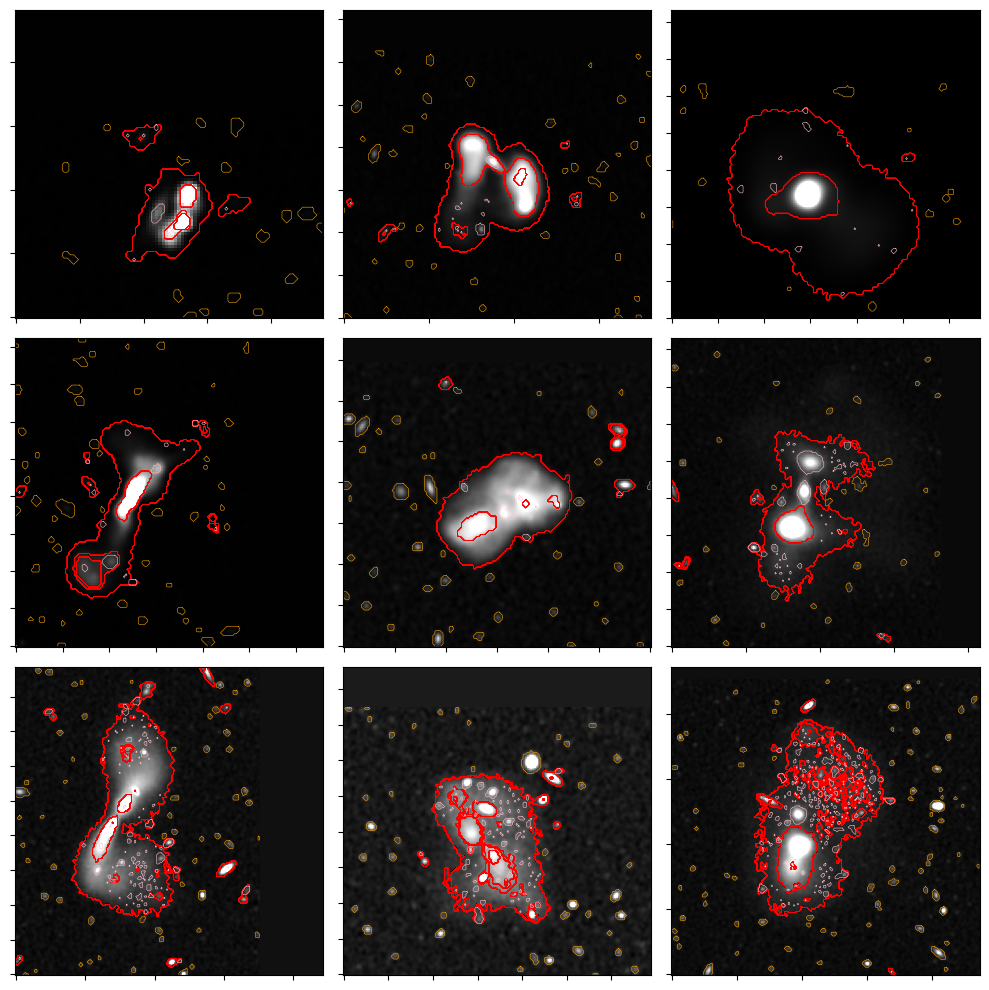

In [6]:
cols = 3
rows = 3
fig, ax = plt.subplots(cols,rows,figsize=(10,10))
i = 0
avoid_list = [9,5,12,13]
for row in range(cols):
    for col in range(rows):
        
        if i in avoid_list:
            i = i + 1
        print(i)
        data1 = trsf_func(filesnames_cutout[i],False,1)
        catalogue = data1.catalogue
        image = data1.full_img
        # drop any pxels that are 0

        #image = crop_padded_area(image)

        #catalogue['Class'][catalogue['Class'] == 2] = 7
        catalogue['Class'][np.isnan(catalogue['Class'])] = 2
        cat0 = catalogue[catalogue['Class'] == 0]
        cat1 = catalogue[catalogue['Class'] == 1]
        cat2 = catalogue[catalogue['Class'] == 2]
        cat3 = catalogue[catalogue['Class'] == 3]

        ax[row,col].imshow(image,origin='lower',cmap='gray',vmax=np.nanpercentile(image,99.5))
        plottings(cat2,'polygonwith',color='r',img=image,name='Class 2',ax=ax[row,col],linewidth=0.4)
        plottings(cat0,'polygonwithout',color='orange',img=image,name='Class 0',ax=ax[row,col],linewidth=0.4)
        plottings(cat3,'polygonwithout',color='purple',img=image,name='Class 3',ax=ax[row,col],linewidth=0.4)
        plottings(cat1,'polygonwithout',color='pink',img=image,name='Class 1',ax=ax[row,col],linewidth=0.4)
        ax[row,col].set_xticklabels([])
        ax[row,col].set_yticklabels([])
        i = i + 1
plt.tight_layout()
plt.savefig('data/mosiac.png',dpi=300)
plt.show()

In [7]:
import glob

PATH_to_3samples = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/'
ProFound_segim_3C401 = PATH_to_3samples+'3C401segim.csv'
ProFound_segim_3C401_skycut35 = PATH_to_3samples+'3C401segim_skycut3.5.csv'
ProFound_segim_3C438 = PATH_to_3samples+'3C438segim.csv'
ProFound_segim_3C452 = PATH_to_3samples+'3C452segim.csv'
ProFound_segim_3C295 = PATH_to_3samples+'3C295segim.csv'
ProFound_segim_3C76P1 = PATH_to_3samples+'3C76P1segim.csv'
ProFound_segim_3C314P1 = PATH_to_3samples+'3C314P1segim.csv'  # best results I could get
ImPAth_3C401 = PATH_to_3samples+'3C401' # try again? skycut = 2
ImPAth_3C438 = PATH_to_3samples+'3C438' #  skycut = 3.5
ImPAth_3C452 = PATH_to_3samples+'3C452' #  skycut = 3.5
ImPAth_3C295 = PATH_to_3samples+'3C295' # skycut = 3.5
ImPAth_3C76P1 = PATH_to_3samples+'3C76P1' # try again? 0.2
ImPAth_3C314P1 = PATH_to_3samples+'3C314P1' # try again? 4skycut == 0.2 

In [8]:
import numpy as np
from matplotlib.path import Path

def create_contour_mask(contours, width, height):
    mask = np.zeros((height, width), dtype=np.uint8)
    
    if isinstance(contours, np.ndarray):
        contours = [contours]
    
    for contour in contours:
        contour = contour[:, [1, 0]]  # Swap x and y for compatibility
        
        path = Path(contour)
        
        x, y = np.meshgrid(np.arange(width), np.arange(height))
        points = np.column_stack((x.ravel(), y.ravel()))
        
        inside = path.contains_points(points)
        inside = inside.reshape((height, width))
        mask[inside] = 1
        
    return mask


-4.271319e-06
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


TRSF finished.
Time taken: 0.5241398811340332 seconds
-------------------
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]


TRSF finished.
Time taken: 0.15587210655212402 seconds
-------------------
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


TRSF finished.
Time taken: 1.3252620697021484 seconds
-------------------
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


TRSF finished.
Time taken: 1.6520798206329346 seconds
-------------------
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


TRSF finished.
Time taken: 2.7747209072113037 seconds
-------------------
0.00012525666


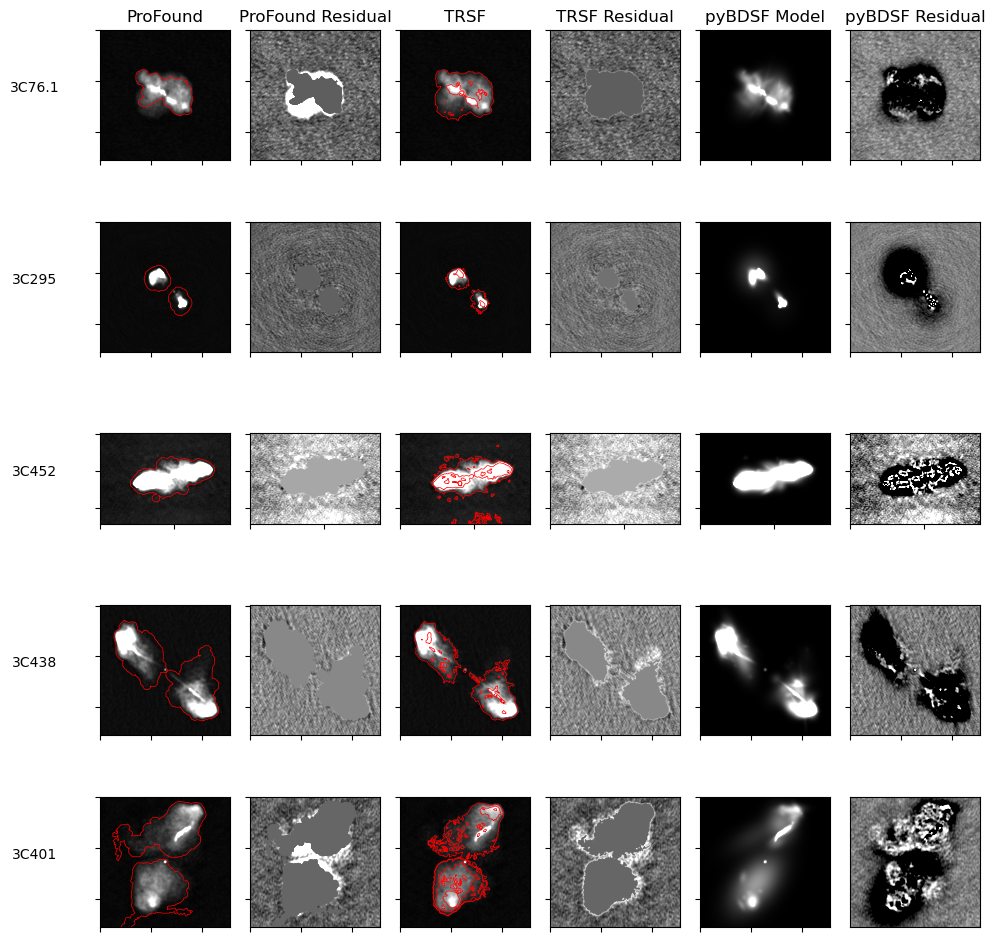

In [9]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage.measure as measure

# read in csv mask 
Vmax_resid = 0.0005
Vmax = 0.01
Vmin = 0

mask_3C76P1 = pd.read_csv(ProFound_segim_3C76P1).to_numpy().T
hdulist = fits.open(ImPAth_3C76P1)
data_3C76P1 = hdulist[0].data[0,0,:,:]

fig, ax = plt.subplots(5,6,figsize=(10,10))
ax[0,0].imshow(data_3C76P1, cmap='gray',vmax=Vmax)
contours = measure.find_contours(mask_3C76P1, 0.8)
contour = contours[15]
ax[0,0].plot(contour[:, 1], contour[:, 0], linewidth=0.5,color='red')
mask = np.zeros(data_3C76P1.shape)
mask = create_contour_mask(np.array(contour), data_3C76P1.shape[1], data_3C76P1.shape[0])
mask_3C76P1_profound = mask
data_3C76P1[mask == 1] = 0

ProFound_resid_3C76P1 = data_3C76P1
ax[0,1].imshow(data_3C76P1, cmap='gray',vmax=Vmax_resid)

mask_3C314P1 = pd.read_csv(ProFound_segim_3C314P1).to_numpy().T
hdulist = fits.open(ImPAth_3C314P1)
data_3C314P1 = hdulist[0].data[0,0,:,:]

mask_3C295 = pd.read_csv(ProFound_segim_3C295).to_numpy().T
hdulist = fits.open(ImPAth_3C295)
data_3C295 = hdulist[0].data[0,0,:,:]

mask_3C452 = pd.read_csv(ProFound_segim_3C452).to_numpy().T
hdulist = fits.open(ImPAth_3C452)
data_3C452 = hdulist[0].data[0,0,:,:]

mask_3C438 = pd.read_csv(ProFound_segim_3C438).to_numpy().T
hdulist = fits.open(ImPAth_3C438)
data_3C438 = hdulist[0].data[0,0,:,:]

mask_3C401 = pd.read_csv(ProFound_segim_3C401).to_numpy().T

hdulist = fits.open(ImPAth_3C401)
data_3C401 = hdulist[0].data[0,0,:,:]
'''
ax[1,0].imshow(data_3C314P1, cmap='gray',vmax=0.001)
contours = measure.find_contours(mask_3C314P1, 0.8)
#for contour in contours:
contour = contours[3]
# and a fake outer one
ax[1,0].plot(contour[:, 1], contour[:, 0], linewidth=0.5,color='red')
# reconstruct a mask from the contours
mask = np.zeros(data_3C314P1.shape)
mask = create_contour_mask(np.array(contour), data_3C314P1.shape[1], data_3C314P1.shape[0])
data_3C314P1[mask == 1] = 0
ax[1,1].imshow(data_3C314P1, cmap='gray',vmax=0.0001)
'''
ax[1,0].imshow(data_3C295, cmap='gray',vmax=Vmax)
contours = measure.find_contours(mask_3C295, 0.8)
for contour in contours:
    ax[1,0].plot(contour[:, 1], contour[:, 0], linewidth=0.5,color='red')

mask = np.zeros(data_3C295.shape)
mask = create_contour_mask(contours, data_3C295.shape[1], data_3C295.shape[0])
mask_3C295_profound = mask
data_3C295[mask == 1] = 0
ProFound_resid_3C295 = data_3C295
ax[1,1].imshow(data_3C295, cmap='gray',vmax=Vmax_resid)
print(np.mean(data_3C295))
ax[2,0].imshow(data_3C452, cmap='gray',vmax=Vmax)
contours = measure.find_contours(mask_3C452, 0.8)
contour = contours[2]
ax[2,0].plot(contour[:, 1], contour[:, 0], linewidth=0.5,color='red')

mask = np.zeros(data_3C452.shape)
mask = create_contour_mask(np.array(contour), data_3C452.shape[1], data_3C452.shape[0])
mask_3C452_profound = mask
data_3C452[mask == 1] = 0
ProFound_resid_3C452 = data_3C452
ax[2,1].imshow(data_3C452, cmap='gray',vmax=Vmax_resid)

ax[3,0].imshow(data_3C438, cmap='gray',vmax=Vmax)
contours = measure.find_contours(mask_3C438, 0.8)
for contour in contours:
    ax[3,0].plot(contour[:, 1], contour[:, 0], linewidth=0.5,color='red')

mask = np.zeros(data_3C438.shape)
mask = create_contour_mask(contours, data_3C438.shape[1], data_3C438.shape[0])
mask_3C438_profound = mask
data_3C438[mask == 1] = 0
ProFound_resid_3C438 = data_3C438
ax[3,1].imshow(data_3C438, cmap='gray',vmax=Vmax_resid)

ax[4,0].imshow(data_3C401, cmap='gray',vmax=Vmax)
contours = measure.find_contours(mask_3C401, 0.8)   
contours = [contours[4],contours[10]]
for contour in contours:
    ax[4,0].plot(contour[:, 1], contour[:, 0], linewidth=0.5,color='red')

mask = np.zeros(data_3C401.shape)
mask = create_contour_mask(contours, data_3C401.shape[1], data_3C401.shape[0])
mask_3C401_profound = mask
data_3C401[mask == 1] = 0
ProFound_resid_3C401 = data_3C401
ax[4,1].imshow(data_3C401, cmap='gray',vmax=Vmax_resid)

trsf_mask = []
trsf_resid = []
def trsf_plot(ax,ax_r,ImPATH):
    imdata = fits.open(ImPATH)[0].data[0,0,:,:]
    if imdata.shape[0] != imdata.shape[1]:
        imdata = make_square(imdata)
    data = trsf_3CRXX(imdata)
    catalogue = data.catalogue
    image = data.full_img

    cat2 = catalogue[catalogue['Class'] == 2] 
    cat0 = catalogue[catalogue['Class'] == 0]
    cat1 = catalogue[catalogue['Class'] == 1]
    cat3 = catalogue[catalogue['Class'] == 3]
    #if ImPATH == ImPAth_3C295:
    #    cat2 = catalogue[catalogue['Class'] == 7]
    if ImPATH == ImPAth_3C452:
        ax.imshow(image[:244,:],cmap='gray',vmax=Vmax)
    else:
        ax.imshow(image,cmap='gray',vmax=Vmax)
    mask = plottings(cat2,'polygonwithout',color='r',img=image,name='Class 2',ax=ax,linewidth=0.5)
    mask = mask + plottings(cat0,'polygonwithout',color='r',img=image,name='Class 0',ax=ax,linewidth=0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    image[mask >= 1] = 0
    if ImPATH == ImPAth_3C452:
        image = image[:244,:]

    ax_r.imshow(image, cmap='gray',vmax=Vmax_resid)
    trsf_resid.append(image)
    trsf_mask.append(mask)

trsf_plot(ax[0,2],ax[0,3],ImPAth_3C76P1)
#trsf_plot(ax[1,2],ax[1,3],ImPAth_3C314P1)
trsf_plot(ax[1,2],ax[1,3],ImPAth_3C295)
trsf_plot(ax[2,2],ax[2,3],ImPAth_3C452)
trsf_plot(ax[3,2],ax[3,3],ImPAth_3C438)
trsf_plot(ax[4,2],ax[4,3],ImPAth_3C401)

# pybdsf Here.


PATH_3C401_bdsf_model = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C401.pybdsf_gaus_model.fits'
PATH_3C401_bdsf_residual = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C401.pybdsf_gaus_resid.fits'

PATH_3C295_bdsf_model = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C295.pybdsf_gaus_model.fits'
PATH_3C295_bdsf_residual = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C295.pybdsf_gaus_resid.fits'

PATH_3C438_bdsf_model = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C438.pybdsf_gaus_model.fits'
PATH_3C438_bdsf_residual = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C438.pybdsf_gaus_resid.fits'

PATH_3C452_bdsf_model = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C452.pybdsf_gaus_model.fits'
PATH_3C452_bdsf_residual = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C452.pybdsf_gaus_resid.fits'

PATH_3C314P1_bdsf_model = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C314P1.pybdsf_gaus_model.fits'
PATH_3C314P1_bdsf_residual = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C314P1.pybdsf_gaus_resid.fits'

PATH_3C76P1_bdsf_model = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C76P1.pybdsf_gaus_model.fits'
PATH_3C76P1_bdsf_residual = '/Users/rs17612/Documents/Radio_Data/3CR_ALL_Three/data/3C76P1.pybdsf_gaus_resid.fits'

def bdsf_plots(model_Path,resid_path,image_path):
    hdulist = fits.open(model_Path)
    model = hdulist[0].data[0,0,:,:]
    hdulist = fits.open(resid_path)
    resid = hdulist[0].data[0,0,:,:]
    hdulist = fits.open(image_path)
    image = hdulist[0].data[0,0,:,:]
    return model,resid,image

BDSf_model_3C401,BDSF_resid_3C401, Image_3C401 = bdsf_plots(PATH_3C401_bdsf_model,PATH_3C401_bdsf_residual,ImPAth_3C401)
BDSf_model_3C295,BDSF_resid_3C295, Image_3C295 = bdsf_plots(PATH_3C295_bdsf_model,PATH_3C295_bdsf_residual,ImPAth_3C295)
BDSf_model_3C438,BDSF_resid_3C438, Image_3C438 = bdsf_plots(PATH_3C438_bdsf_model,PATH_3C438_bdsf_residual,ImPAth_3C438)
BDSf_model_3C452,BDSF_resid_3C452, Image_3C452 = bdsf_plots(PATH_3C452_bdsf_model,PATH_3C452_bdsf_residual,ImPAth_3C452)
#BDSf_model_3C314P1,BDSF_resid_3C314P1 = bdsf_plots(PATH_3C314P1_bdsf_model,PATH_3C314P1_bdsf_residual)
BDSf_model_3C76P1,BDSF_resid_3C76P1, Image_3C76P1 = bdsf_plots(PATH_3C76P1_bdsf_model,PATH_3C76P1_bdsf_residual,ImPAth_3C76P1)
resid = BDSf_model_3C76P1 - Image_3C76P1
print(np.mean(resid))

ax[0,4].imshow(BDSf_model_3C76P1,cmap='gray',vmax=Vmax)
ax[0,5].imshow(-(BDSf_model_3C76P1 - Image_3C76P1),cmap='gray',vmax=Vmax_resid,vmin=-Vmax_resid)
BDSF_resid_3C76P1 = -(BDSf_model_3C76P1 - Image_3C76P1)

ax[1,4].imshow(BDSf_model_3C295,cmap='gray',vmax=Vmax)
ax[1,5].imshow(-(BDSf_model_3C295 - Image_3C295),cmap='gray',vmax=Vmax_resid,vmin=-Vmax_resid)
BDSF_resid_3C295 = -(BDSf_model_3C295 - Image_3C295)

ax[2,4].imshow(BDSf_model_3C452,cmap='gray',vmax=Vmax)
ax[2,5].imshow(-(BDSf_model_3C452 - Image_3C452),cmap='gray',vmax=Vmax_resid,vmin=-Vmax_resid)
BDSF_resid_3C452 = -(BDSf_model_3C452 - Image_3C452)
ax[3,4].imshow(BDSf_model_3C438,cmap='gray',vmax=Vmax)
ax[3,5].imshow(-(BDSf_model_3C438 - Image_3C438),cmap='gray',vmax=Vmax_resid,vmin=-Vmax_resid)
BDSF_resid_3C438 = -(BDSf_model_3C438 - Image_3C438)
ax[4,4].imshow(BDSf_model_3C401,cmap='gray',vmax=Vmax)
ax[4,5].imshow(-(BDSf_model_3C401 - Image_3C401),cmap='gray',vmax=Vmax_resid,vmin=-Vmax_resid)
BDSF_resid_3C401 = -(BDSf_model_3C401 - Image_3C401)
# residual from the residual image.

# go through all rows and cols and set ticklabels to none
for row in range(5):
    for col in range(6):
        ax[row,col].set_xticklabels([])
        ax[row,col].set_yticklabels([])

ax[0,0].set_title('ProFound')
ax[0,0].set_ylabel('3C76.1',rotation=0,labelpad=40)
ax[1,0].set_ylabel('3C295',rotation=0,labelpad=40)
ax[2,0].set_ylabel('3C452',rotation=0,labelpad=40)
ax[3,0].set_ylabel('3C438',rotation=0,labelpad=40)
ax[4,0].set_ylabel('3C401',rotation=0,labelpad=40)

ax[0,1].set_title('ProFound Residual')
ax[0,2].set_title('TRSF')
ax[0,3].set_title('TRSF Residual')
ax[0,4].set_title('pyBDSF Model')
ax[0,5].set_title('pyBDSF Residual')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('data/extended_emission_mosiac.svg',format='svg')
plt.show()

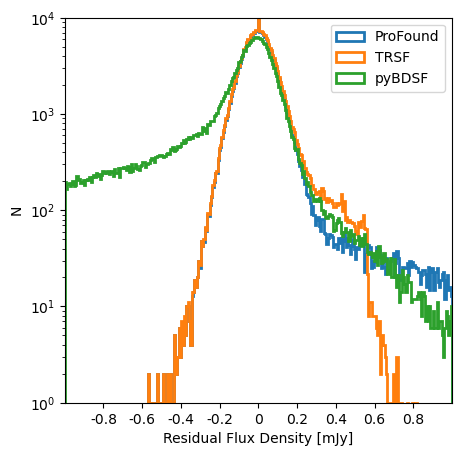

In [10]:
bins = np.linspace(-1E-3,1E-3,300)
# removal of 3C452 due to added padding obsuring the comparison.
Profound_resid_combined = np.hstack([ProFound_resid_3C295.flatten(),ProFound_resid_3C401.flatten(), ProFound_resid_3C438.flatten(), ProFound_resid_3C76P1.flatten()])
TRSF_resid_combined = np.hstack([trsf_resid[1].flatten(),trsf_resid[4].flatten(),trsf_resid[3].flatten(),trsf_resid[0].flatten()])
BDSF_resid_combined = np.hstack([BDSF_resid_3C295.flatten(),BDSF_resid_3C401.flatten(),BDSF_resid_3C438.flatten(),BDSF_resid_3C76P1.flatten()])
# modelling noise here is hard because these images are all taken from different telescopes and have different noise properties.
plt.figure(figsize=(5,5))
plt.hist(Profound_resid_combined,bins=bins,histtype='step',label='ProFound',linewidth=2)
plt.hist(TRSF_resid_combined,bins=bins,histtype='step',label='TRSF',linewidth=2)
plt.hist(BDSF_resid_combined,bins=bins,histtype='step',label='pyBDSF',linewidth=2)
plt.yscale('log')
plt.xlabel('Residual Flux Density [mJy]')
plt.ylabel('N')
plt.ylim(1,1E4)
plt.xlim(-1E-3,1E-3)
plt.xticks([-0.8E-3,-0.6E-3,-0.4E-3,-0.2E-3,0,0.2E-3,0.4E-3,0.6E-3,0.8E-3],['-0.8','-0.6','-0.4','-0.2','0','0.2','0.4','0.6','0.8'])
plt.legend()
plt.savefig('data/noise_comparison.svg',format='svg')
plt.show()

In [11]:
# get the same from TRSF and pybdsf next.

def trsf_plot(ax,ImPATH):
    imdata = fits.open(ImPAth_3C314P1)[0].data[0,0,:,:]
    if imdata.shape[0] != imdata.shape[1]:
        imdata = make_square(imdata)
    data = trsf_3CRXX(imdata)
    catalogue = data.catalogue
    image = data.full_img

    cat2 = catalogue[catalogue['Class'] == 2] 
    cat0 = catalogue[catalogue['Class'] == 0]
    cat3 = catalogue[catalogue['Class'] == 3]
    cat1 = catalogue[catalogue['Class'] == 1]
    plt.imshow(image,cmap='gray',vmax=0.01)
    plottings(cat2,'polygonwith',color='r',img=image,name='Class 2',ax=ax,linewidth=0.2)
    ax.set_xtick([])
    ax.set_ytick([])


In [12]:
# open srl catalogues.
PATH_MASK_3C76P1 = '/Users/rs17612/Documents/GitHub/TRSF/data/catalogues/pybdsf_data/3C76P1.pybdsf_island_mask.fits'
PATH_MASK_3C295 = '/Users/rs17612/Documents/GitHub/TRSF/data/catalogues/pybdsf_data/3C295.pybdsf_island_mask.fits'
PATH_MASK_3C452 = '/Users/rs17612/Documents/GitHub/TRSF/data/catalogues/pybdsf_data/3C452.pybdsf_island_mask.fits'
PATH_MASK_3C438 = '/Users/rs17612/Documents/GitHub/TRSF/data/catalogues/pybdsf_data/3C438.pybdsf_island_mask.fits'
PATH_MASK_3C401 = '/Users/rs17612/Documents/GitHub/TRSF/data/catalogues/pybdsf_data/3C401.pybdsf_island_mask.fits'

# open fits file
BDSF_mask_3C76P1 = fits.open(PATH_MASK_3C76P1)[0].data[0,0,:,:]
BDSF_mask_3C295 = fits.open(PATH_MASK_3C295)[0].data[0,0,:,:]
BDSF_mask_3C452 = fits.open(PATH_MASK_3C452)[0].data[0,0,:,:]
BDSF_mask_3C438 = fits.open(PATH_MASK_3C438)[0].data[0,0,:,:]
BDSF_mask_3C401 = fits.open(PATH_MASK_3C401)[0].data[0,0,:,:]


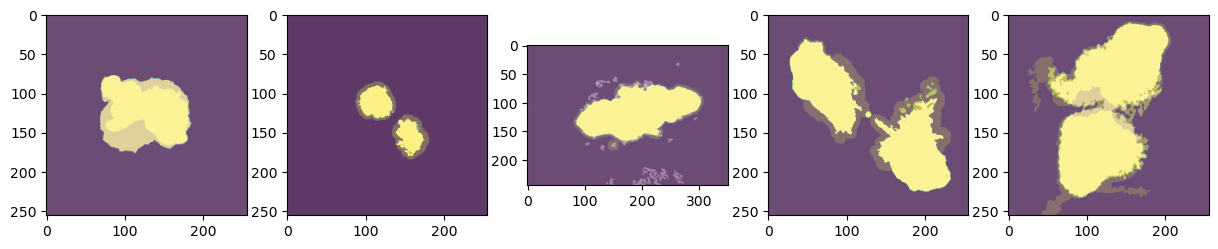

In [13]:
# plot the masks from TRSF and ProFound

trsf_mask_3C76P1 = trsf_mask[0]
trsf_mask_3C295 = trsf_mask[1]
trsf_mask_3C452 = trsf_mask[2]
trsf_mask_3C438 = trsf_mask[3]
trsf_mask_3C401 = trsf_mask[4]

trsf_mask_3C76P1[trsf_mask_3C76P1 >= 1] = 1
trsf_mask_3C295[trsf_mask_3C295 >= 1] = 1
trsf_mask_3C452[trsf_mask_3C452 >= 1] = 1
trsf_mask_3C438[trsf_mask_3C438 >= 1] = 1
trsf_mask_3C401[trsf_mask_3C401 >= 1] = 1

fig, ax = plt.subplots(1,5,figsize=(15,15))
ax[0].imshow(mask_3C76P1_profound,alpha=0.33)
ax[0].imshow(trsf_mask_3C76P1,cmap='gray',alpha=0.33)
ax[0].imshow(BDSF_mask_3C76P1,alpha=0.33)
ax[1].imshow(mask_3C295_profound,alpha=0.5)
ax[1].imshow(trsf_mask_3C295,cmap='gray',alpha=0.33)
ax[1].imshow(BDSF_mask_3C295,alpha=0.33)
ax[2].imshow(mask_3C452_profound,alpha=0.33)
ax[2].imshow(trsf_mask_3C452[:244,:],cmap='gray',alpha=0.33)
ax[2].imshow(BDSF_mask_3C452,alpha=0.33)
ax[3].imshow(mask_3C438_profound,alpha=0.33)
ax[3].imshow(trsf_mask_3C438,cmap='gray',alpha=0.33)
ax[3].imshow(BDSF_mask_3C438,alpha=0.33)
ax[4].imshow(mask_3C401_profound,alpha=0.33)
ax[4].imshow(trsf_mask_3C401,cmap='gray',alpha=0.33)
ax[4].imshow(BDSF_mask_3C401,alpha=0.33)
plt.show() 

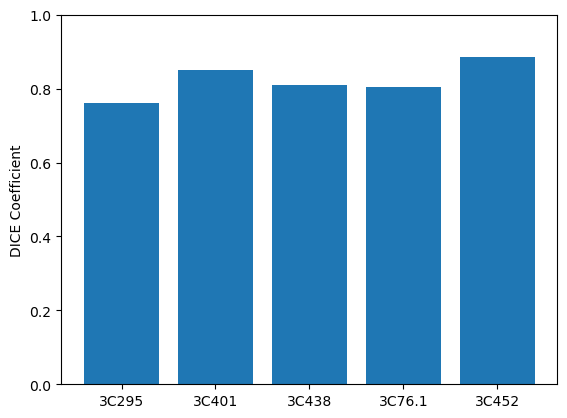

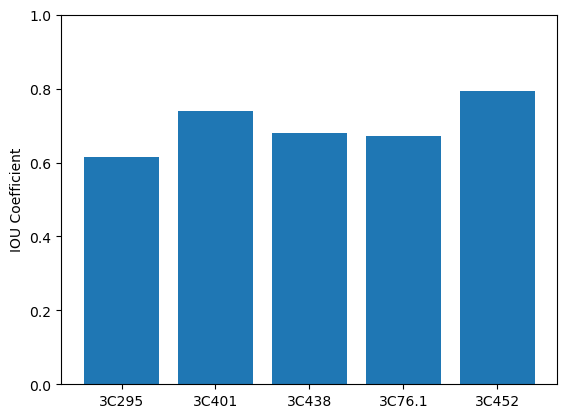

In [28]:
# funciton to calculate the DICE coefficent between two masks.
def dice_coefficient(mask1,mask2):
    intersection = np.sum(mask1*mask2)
    union = np.sum(mask1) + np.sum(mask2)
    return 2*intersection/union
def iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

import numpy as np
from scipy.spatial.distance import directed_hausdorff

def hausdorff_distance(mask1, mask2):
    # Get the coordinates of the non-zero pixels in the masks
    coords1 = np.transpose(np.nonzero(mask1))
    coords2 = np.transpose(np.nonzero(mask2))
    
    # Calculate the directed Hausdorff distance between the two sets of coordinates
    dist1 = directed_hausdorff(coords1, coords2)[0]
    dist2 = directed_hausdorff(coords2, coords1)[0]
    
    # Return the maximum of the two distances
    return max(dist1, dist2)

# calculate the DICE coefficent between the TRSF and ProFound masks.
dice_coef_3C295_pf = dice_coefficient(trsf_mask_3C295,mask_3C295_profound)
dice_coef_3C401_pf = dice_coefficient(trsf_mask_3C401,mask_3C401_profound)
dice_coef_3C438_pf = dice_coefficient(trsf_mask_3C438,mask_3C438_profound)
dice_coef_3C452_pf = dice_coefficient(trsf_mask_3C452[:244,:],mask_3C452_profound)
dice_coef_3C76P1_pf = dice_coefficient(trsf_mask_3C76P1,mask_3C76P1_profound)

dice_coef_3C295_BDSF = dice_coefficient(trsf_mask_3C295,BDSF_mask_3C295)
dice_coef_3C401_BDSF = dice_coefficient(trsf_mask_3C401,BDSF_mask_3C401)
dice_coef_3C438_BDSF = dice_coefficient(trsf_mask_3C438,BDSF_mask_3C438)
dice_coef_3C452_BDSF = dice_coefficient(trsf_mask_3C452[:244,:],BDSF_mask_3C452)
dice_coef_3C76P1_BDSF = dice_coefficient(trsf_mask_3C76P1,BDSF_mask_3C76P1)

# calculate the IOU coefficent between the TRSF and ProFound masks.
iou_coef_3C295_pf = iou(trsf_mask_3C295,mask_3C295_profound)
iou_coef_3C401_pf = iou(trsf_mask_3C401,mask_3C401_profound)
iou_coef_3C438_pf = iou(trsf_mask_3C438,mask_3C438_profound)
iou_coef_3C452_pf = iou(trsf_mask_3C452[:244,:],mask_3C452_profound)
iou_coef_3C76P1_pf = iou(trsf_mask_3C76P1,mask_3C76P1_profound)

iou_coef_3C295_BDSF = iou(trsf_mask_3C295,BDSF_mask_3C295)
iou_coef_3C401_BDSF = iou(trsf_mask_3C401,BDSF_mask_3C401)
iou_coef_3C438_BDSF = iou(trsf_mask_3C438,BDSF_mask_3C438)
iou_coef_3C452_BDSF = iou(trsf_mask_3C452[:244,:],BDSF_mask_3C452)
iou_coef_3C76P1_BDSF = iou(trsf_mask_3C76P1,BDSF_mask_3C76P1)


# calculate the hausdorff distance between the TRSF and ProFound masks.
hausdorff_3C295_pf = hausdorff_distance(trsf_mask_3C295,mask_3C295_profound)
hausdorff_3C401_pf = hausdorff_distance(trsf_mask_3C401,mask_3C401_profound)
hausdorff_3C438_pf = hausdorff_distance(trsf_mask_3C438,mask_3C438_profound)
hausdorff_3C452_pf = hausdorff_distance(trsf_mask_3C452[:244,:],mask_3C452_profound)
hausdorff_3C76P1_pf = hausdorff_distance(trsf_mask_3C76P1,mask_3C76P1_profound)

# plot these as bars with the cpoeff on the y and the source on the x.
dice_coef_pf = [dice_coef_3C295_pf,dice_coef_3C401_pf,dice_coef_3C438_pf,dice_coef_3C76P1_pf,dice_coef_3C452_pf]
names = ['3C295','3C401','3C438','3C76.1','3C452']
plt.bar(names,dice_coef_pf)
plt.ylabel('DICE Coefficient')
plt.ylim(0,1)
plt.show()

# plot these as bars with the cpoeff on the y and the source on the x.
iou_coef_pf = [iou_coef_3C295_pf,iou_coef_3C401_pf,iou_coef_3C438_pf,iou_coef_3C76P1_pf,iou_coef_3C452_pf]
names = ['3C295','3C401','3C438','3C76.1','3C452']
plt.bar(names,iou_coef_pf)
plt.ylabel('IOU Coefficient')
plt.ylim(0,1)
plt.show()


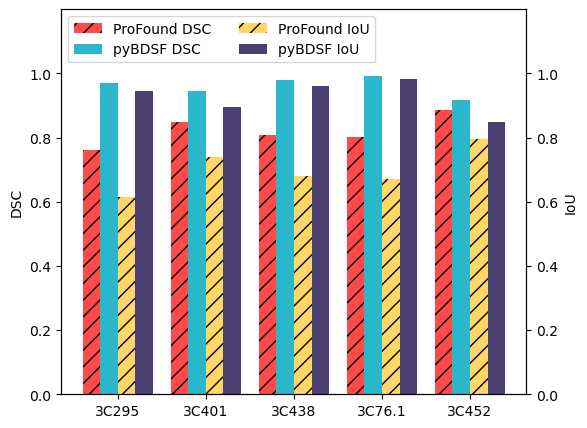

In [84]:
index = np.arange(len(names))
width = 0.2
dice_coef_BDSF = [dice_coef_3C295_BDSF,dice_coef_3C401_BDSF,dice_coef_3C438_BDSF,dice_coef_3C76P1_BDSF,dice_coef_3C452_BDSF]
iou_coef_BDSF = [iou_coef_3C295_BDSF,iou_coef_3C401_BDSF,iou_coef_3C438_BDSF,iou_coef_3C76P1_BDSF,iou_coef_3C452_BDSF]
colors = ['#FE4A49','#2AB7CA','#FED766','#4B3F72']
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(index,dice_coef_pf,width,color=colors[0],label='ProFound DSC',hatch='//')
ax.bar(index+width,dice_coef_BDSF,width,color=colors[1],label='pyBDSF DSC')

ax.set_ylabel('DSC')
ax2 = ax.twinx()
ax.bar(index+width*2,iou_coef_pf,width,color=colors[2],label='ProFound IoU',hatch='//')
ax.bar(index+width*3,iou_coef_BDSF,width,color=colors[3],label='pyBDSF IoU')
ax2.set_ylabel('IoU')
ax.set_xticks(index + width*3 / 2)
ax.set_xticklabels(names)
ax.legend(loc='upper left',ncol=2)
ax.set_ylim(0,1.2)

ax.set_yticks(np.arange(0,1.1,0.2))
ax2.set_ylim(0,1.2)
ax2.set_yticks(np.arange(0,1.1,0.2))
plt.savefig('data/figures/overlap_comparison_bars.svg',format='svg')
plt.show()

In [17]:
# DICE coefficent 
# gages the similarity between two sets of data.
# 1 is perfect, 0 is no similarity.

# DSC = 2|X and Y|/ |X|+|Y|

# IoU coefficent
# intersection over union
# 1 is perfect, 0 is no similarity.

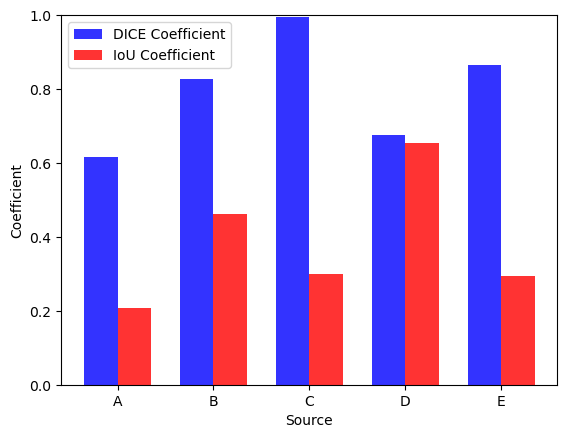

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
names = ['A', 'B', 'C', 'D', 'E']
dice_coef = np.random.rand(5)
iou_coef = np.random.rand(5)

# Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = np.arange(len(names))

rects1 = ax.bar(index, dice_coef, bar_width, alpha=opacity, color='b', label='DICE Coefficient')
rects2 = ax.bar(index + bar_width, iou_coef, bar_width, alpha=opacity, color='r', label='IoU Coefficient')

ax.set_xlabel('Source')
ax.set_ylabel('Coefficient')
ax.set_ylim(0, 1)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(names)
ax.legend()

plt.show()